In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pandas.io.excel import ExcelWriter

# learning model lib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

from IPython.core.pylabtools import figsize

In [2]:
df = pd.read_csv('./student-mat.csv', sep=';')
df = df[~df['G3'].isin([0, 1])]
df = df.rename(columns={'G3': 'Grade'})
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [3]:
df.shape

(357, 33)

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df['Grade'].value_counts()

10    56
11    47
15    33
8     32
12    31
13    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: Grade, dtype: int64

In [6]:
import matplotlib.pyplot as plt
plt.bar(df['Grade'].value_counts().index, 
        df['Grade'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');
plt.xticks(list(range(5, 21)));

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


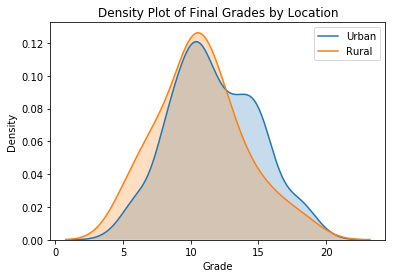

In [7]:
import seaborn as sns

#Grade distribution by address
sns.kdeplot(df.loc[df['address'] == 'U', 'Grade'], label = 'Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'Grade'], label = 'Rural', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Location');

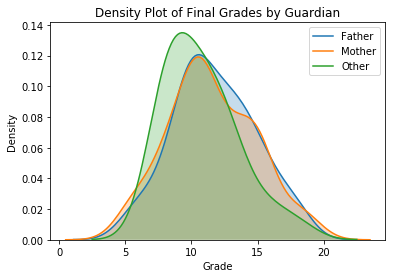

In [8]:
# Grade distribution by Guardian
sns.kdeplot(df.loc[df['guardian'] == 'father', 'Grade'], label = 'Father', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'mother', 'Grade'], label = 'Mother', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'other', 'Grade'], label = 'Other', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Guardian');

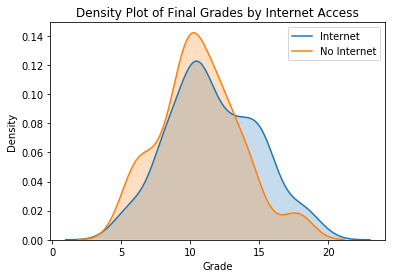

In [9]:
# Grade distribution by internet
sns.kdeplot(df.loc[df['internet'] == 'yes', 'Grade'], label = 'Internet', shade = True)
sns.kdeplot(df.loc[df['internet'] == 'no', 'Grade'], label = 'No Internet', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Internet Access');

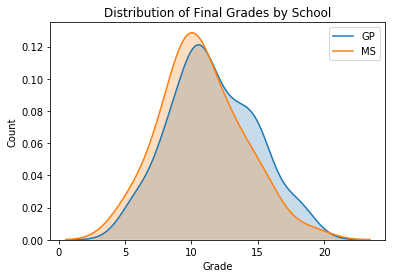

In [10]:
# Grade distribution by school
sns.kdeplot(df.loc[df['school'] == 'GP', 'Grade'], label = 'GP', shade = True)
sns.kdeplot(df.loc[df['school'] == 'MS', 'Grade'], label = 'MS', shade = True)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades by School');

In [11]:
# Correlations of numerical values
df.corr()['Grade'].sort_values()

failures     -0.293831
absences     -0.213129
Walc         -0.190054
goout        -0.177383
Dalc         -0.140690
age          -0.140372
traveltime   -0.099785
health       -0.081691
freetime     -0.021589
famrel        0.037711
studytime     0.126728
Fedu          0.158811
Medu          0.190308
G1            0.891805
G2            0.965583
Grade         1.000000
Name: Grade, dtype: float64

In [12]:
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['Grade'] = df['Grade']
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Grade
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,10


In [13]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['Grade'].sort_values()

schoolsup_yes       -0.238365
Mjob_other          -0.142541
address_R           -0.130090
higher_no           -0.113419
internet_no         -0.111624
sex_F               -0.102448
Mjob_at_home        -0.090624
school_MS           -0.083615
Fjob_other          -0.081502
guardian_other      -0.069491
famsup_yes          -0.067305
activities_no       -0.058600
reason_course       -0.050918
romantic_yes        -0.049944
famsize_GT3         -0.039744
paid_yes            -0.028899
Pstatus_T           -0.026665
nursery_no          -0.026541
Fjob_services       -0.018154
reason_other        -0.003897
reason_home          0.000372
Fjob_health          0.006241
guardian_mother      0.007728
nursery_yes          0.026541
Pstatus_A            0.026665
paid_no              0.028899
Fjob_at_home         0.028954
guardian_father      0.035220
famsize_LE3          0.039744
Mjob_teacher         0.045390
romantic_no          0.049944
reason_reputation    0.056573
activities_yes       0.058600
famsup_no 

In [14]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data(df):
    # Targets are final grade of student
    labels = df['Grade']
    
    # Drop the school and the grades from features
    df = df.drop(columns=['school'])
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:8]
    
    df = df.loc[:, most_correlated.index]
    df = df.drop(columns = 'schoolsup_no')
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.2,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,Grade,G2,G1,failures,schoolsup_yes,absences,Medu
308,12,12,15,1,0,0,3
368,10,10,11,0,0,0,2
315,11,11,13,1,0,40,2
75,10,9,9,0,0,6,4
280,8,8,8,0,0,30,4


In [16]:
# Rename variables in train and teste
X_train = X_train.rename(columns={'schoolsup_yes': 'schoolsup', 
                                  'Medu': 'mother_edu'})

X_test = X_test.rename(columns={'schoolsup_yes': 'schoolsup', 
                                  'Medu': 'mother_edu'})

In [17]:
X_train.head()

,Grade,G2,G1,failures,schoolsup,absences,mother_edu
308,12,12,15,1,0,0,3
368,10,10,11,0,0,0,2
315,11,11,13,1,0,40,2
75,10,9,9,0,0,6,4
280,8,8,8,0,0,30,4


In [18]:
print(X_train.shape)
print(X_test.shape)

(285, 7)
(72, 7)


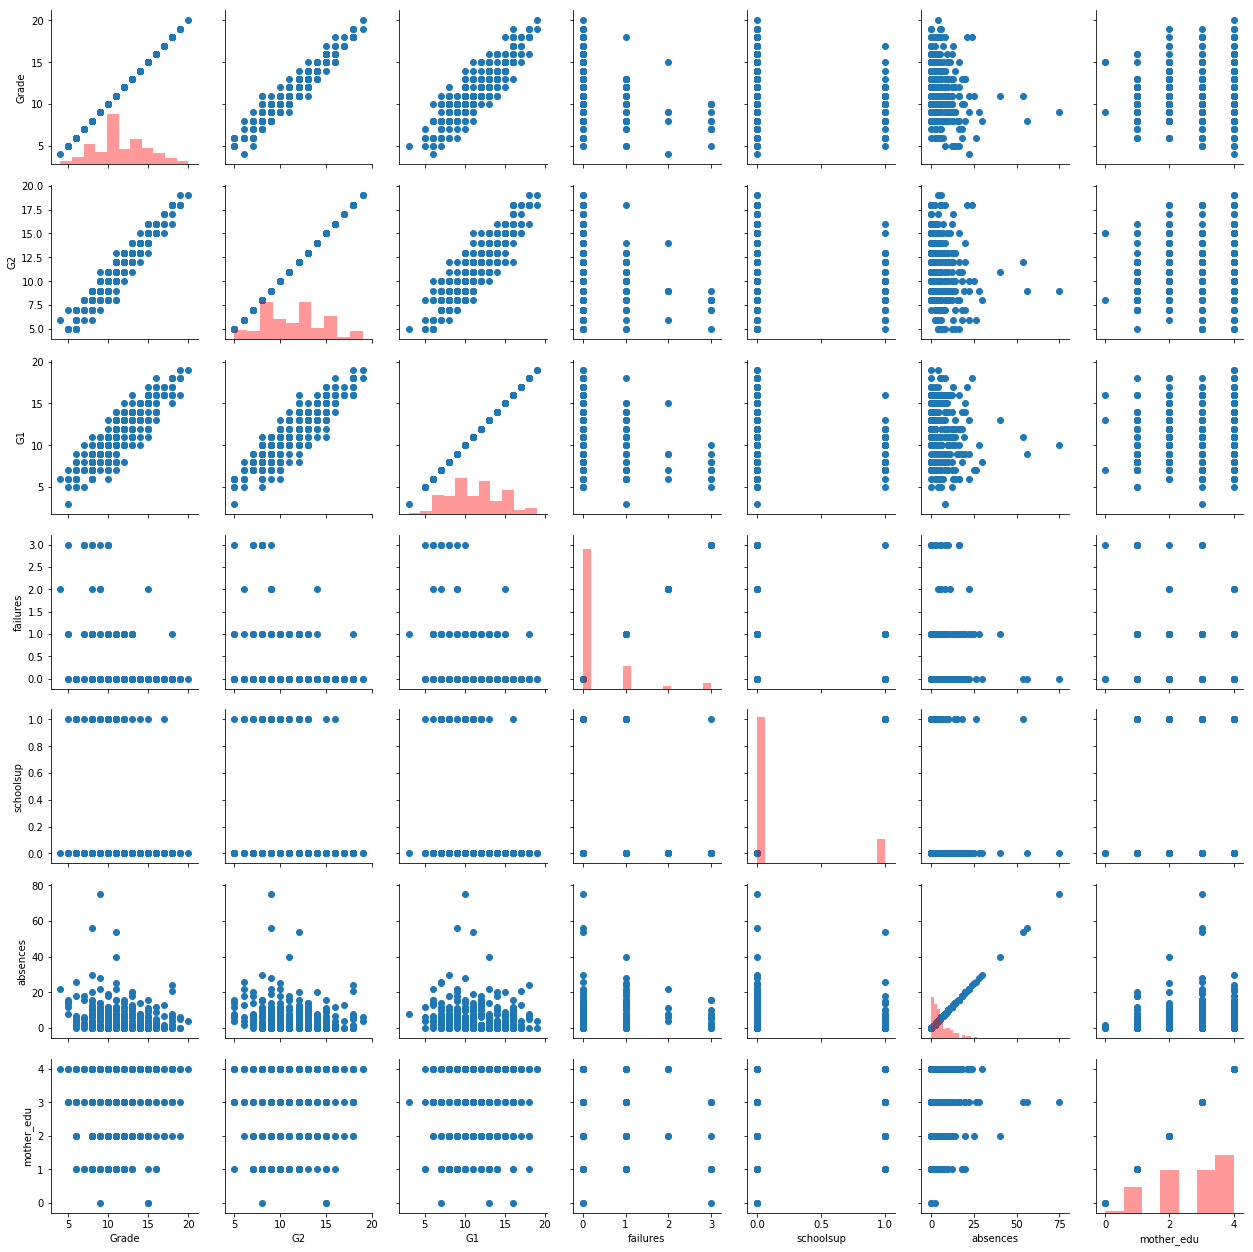

In [19]:
g = sns.PairGrid(X_train)
g = g.map(plt.scatter)
g.map_diag(sns.distplot, kde=False, color = 'red')

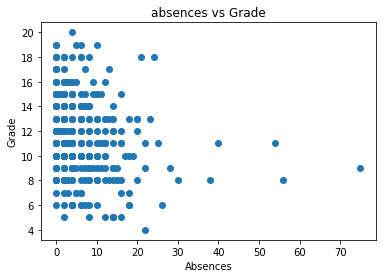

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [20]:
plt.scatter((df['absences']),df['Grade'])
plt.title("absences vs Grade")
plt.xlabel("Absences")
plt.ylabel("Grade")
plt.show()
sns.despine

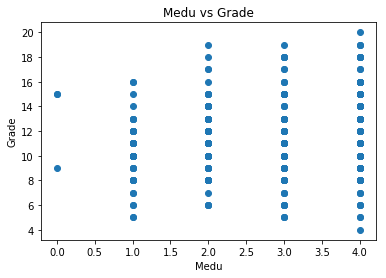

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [21]:
plt.scatter((df['Medu']),df['Grade'])
plt.title("Medu vs Grade")
plt.xlabel("Medu")
plt.ylabel("Grade")
plt.show()
sns.despine

In [22]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [23]:
# Naive baseline is the median
median_pred = X_train['Grade'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Grade']

In [24]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 2.5417
Median Baseline RMSE: 3.1336


In [25]:

# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='Grade')
    X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    print(model1.score(X_test, y_test))
    print(model2.score(X_test, y_test))
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [26]:
results = evaluate(X_train, X_test, y_train, y_test)

0.9319831891000135
0.9215463592541668


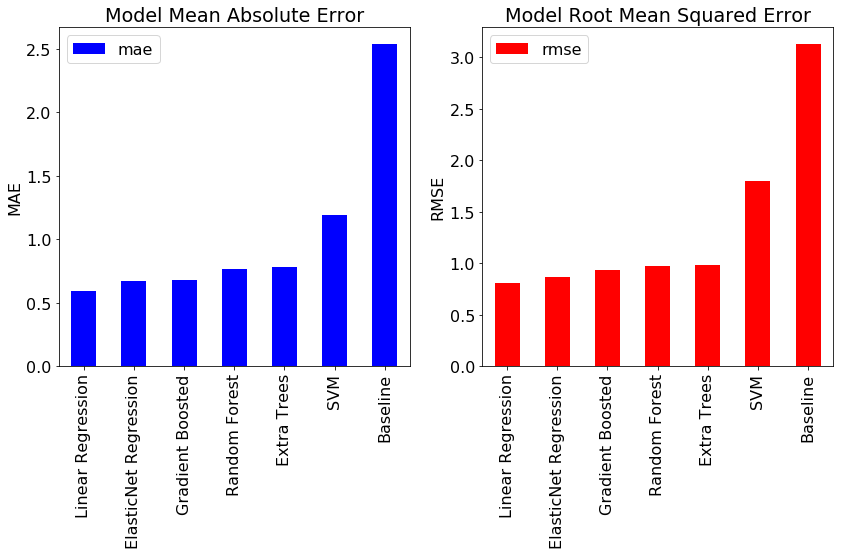

In [27]:
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [28]:
results

,mae,rmse
Linear Regression,0.591942,0.809493
ElasticNet Regression,0.671934,0.869383
Random Forest,0.767442,0.973406
Extra Trees,0.780278,0.983764
SVM,1.18742,1.80205
Gradient Boosted,0.680203,0.935139
Baseline,2.54167,3.1336


In [29]:
print('The Linear Regression is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Linear Regression', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Linear Regression is 76.71% better than the baseline.


In [30]:
# Fomular
lr = LinearRegression()
lr.fit(X_train.drop(columns='Grade'), y_train)

ols_formula = 'Grade = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'Grade = 0.28 + 0.87 * G2 + 0.13 * G1 + 0.02 * failures + -0.05 * schoolsup + -0.01 * absences + 0.01 * mother_edu'

In [31]:
# Linear regression 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lr.score(X_test, y_test)

1.0

In [33]:
test = X_test.drop(columns = 'Grade')
train = X_train.drop(columns = 'Grade')
test.shape

(72, 6)

In [34]:
y_test.head()

243    12
42     18
319    11
328     9
56     15
Name: Grade, dtype: int64

In [35]:
train.head()

,G2,G1,failures,schoolsup,absences,mother_edu
308,12,15,1,0,0,3
368,10,11,0,0,0,2
315,11,13,1,0,40,2
75,9,9,0,0,6,4
280,8,8,0,0,30,4


In [36]:
lr1 = LinearRegression()
lr1.fit(train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lr1.score(test, y_test)

0.9319831891000135

In [38]:
y_test.head()
X_test.head()

,Grade,G2,G1,failures,schoolsup,absences,mother_edu
243,12,12,13,0,0,0,4
42,18,18,19,0,0,2,4
319,11,11,11,0,0,2,4
328,9,9,10,0,0,7,4
56,15,15,14,0,0,0,4


In [39]:
a = lr1.predict([[12, 13, 0, 0, 0, 4]])
print(a)

[12.35231871]
